In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
cf = fetch_california_housing()

In [3]:
cf.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(cf.feature_names,cf.target_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] ['MedHouseVal']


In [5]:
df = pd.DataFrame(data = cf.data, columns = cf.feature_names)

In [6]:
df['MedHouseVal'] = pd.DataFrame(data = cf.target, columns = cf.target_names)

In [7]:
# %run ml_functions.ipynb

In [8]:
# outliers_check(df)

In [9]:
df.head().T

,0,1,2,3,4
MedInc,8.325200,8.301400,7.257400,5.643100,3.846200
HouseAge,41.000000,21.000000,52.000000,52.000000,52.000000
AveRooms,6.984127,6.238137,8.288136,5.817352,6.281853
AveBedrms,1.023810,0.971880,1.073446,1.073059,1.081081
Population,322.000000,2401.000000,496.000000,558.000000,565.000000
AveOccup,2.555556,2.109842,2.802260,2.547945,2.181467
Latitude,37.880000,37.860000,37.850000,37.850000,37.850000
Longitude,-122.230000,-122.220000,-122.240000,-122.250000,-122.250000
MedHouseVal,4.526000,3.585000,3.521000,3.413000,3.422000


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
def outliers_check(df1):
    for cols in df1.columns:
    #     if df[cols].dtype!='object':
        print(cols)
        sns.boxplot(data = df1[cols])
        plt.show()

MedInc


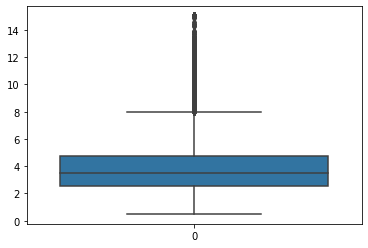

HouseAge


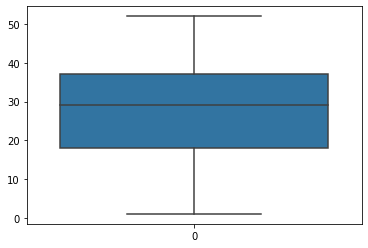

AveRooms


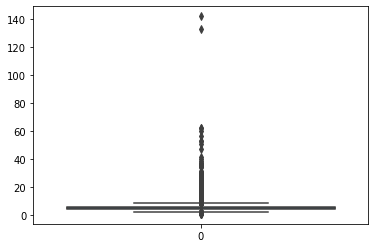

AveBedrms


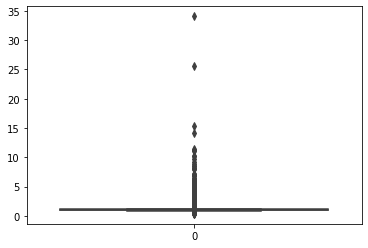

Population


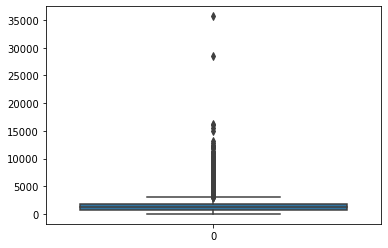

AveOccup


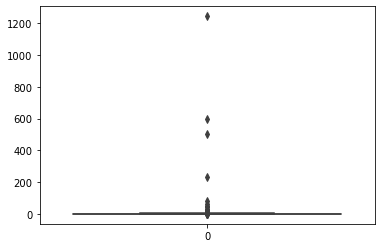

Latitude


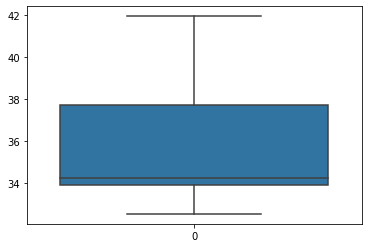

Longitude


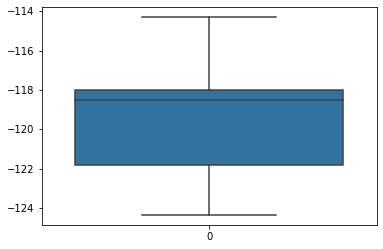

MedHouseVal


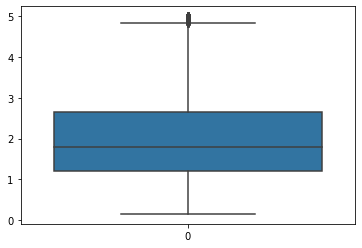

In [12]:
outliers_check(df)

In [13]:
def outliers_treatment(df1,target):
    
    for cols in df1.columns:
        if cols != target:
            Q1 = np.percentile(df1[cols],25)
            Q3 = np.percentile(df1[cols],75)
            IQR = Q3-Q1
            lower = Q1 - (IQR*1.5)
            upper = Q3 + (IQR*1.5)
            df1[cols] = df1[cols].apply(lambda value : lower if value <lower else upper if value>upper else value)
    return df1

In [14]:
df = outliers_treatment(df,'MedHouseVal')

MedInc


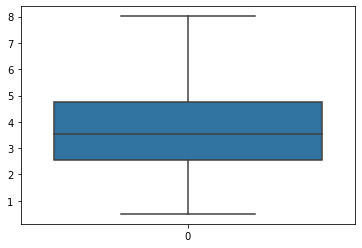

HouseAge


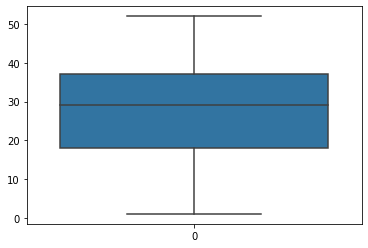

AveRooms


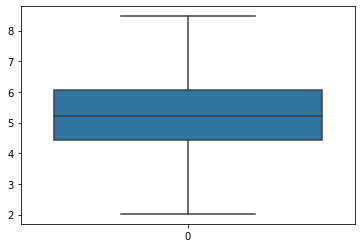

AveBedrms


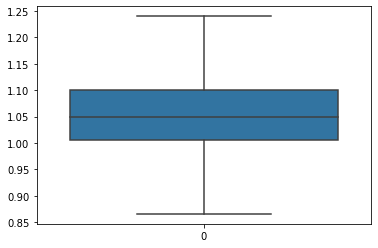

Population


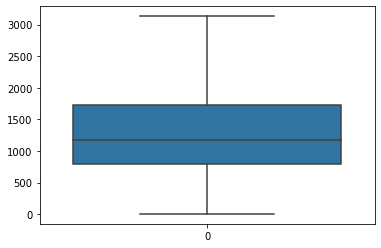

AveOccup


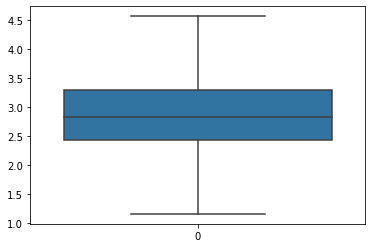

Latitude


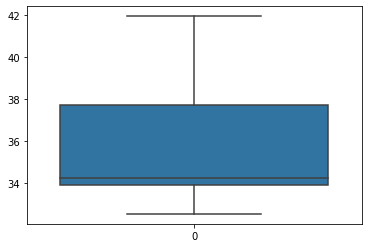

Longitude


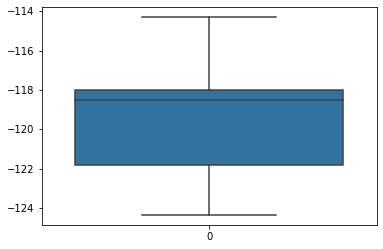

MedHouseVal


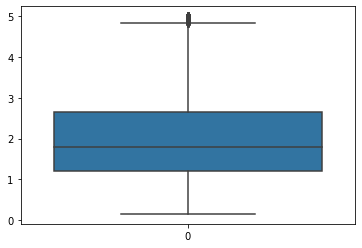

In [15]:
outliers_check(df)

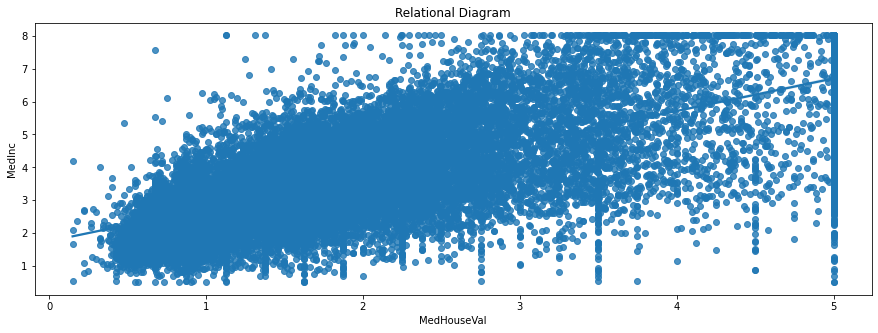

In [16]:
# fig = plt.figure(figsize = (15,15))
# sns.regplot(x='MedHouseVal',y='MedInc',data = df,fit_reg = True)
# plt.title("Relational diagram")
# plt.show()

%run ml_functions.ipynb
relational_graph('MedHouseVal','MedInc',df,"Relational Diagram",15,5)

In [17]:
df_corr = df.corr().abs()

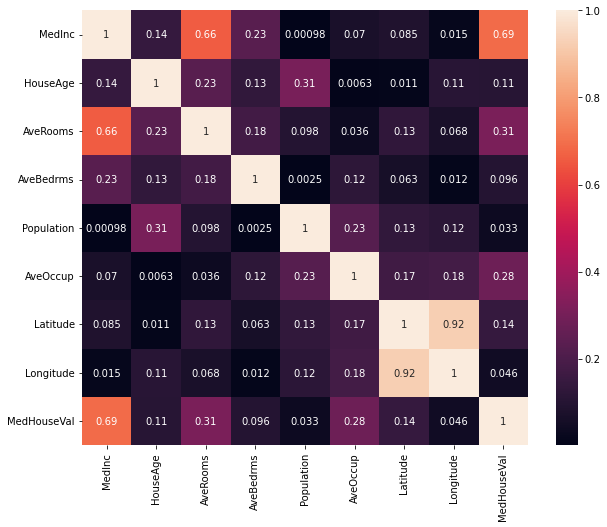

In [18]:
# sns.heatmap(df_corr)

fig = plt.figure(figsize= (10,8))
ax = sns.heatmap(df_corr,annot = True)

In [19]:
df_corr["MedHouseVal"]

MedInc         0.689001
HouseAge       0.105623
AveRooms       0.311003
AveBedrms      0.096055
Population     0.032739
AveOccup       0.281148
Latitude       0.144160
Longitude      0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [20]:
def dropColumns():
  drop_cols = []
  drop_cols.append('MedHouseVal')
  df2 = df_corr['MedHouseVal']
  for col in df2.keys():
    if col != 'MedHouseVal':
      if df2[col] < 0.20:
        drop_cols.append(col)
  return drop_cols
drop_cols = dropColumns()

In [21]:
drop_cols

['MedHouseVal', 'HouseAge', 'AveBedrms', 'Population', 'Latitude', 'Longitude']

In [22]:
X = df.drop(drop_cols,axis = 1)
y = df['MedHouseVal']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [24]:
regr = LinearRegression()

In [25]:
regr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = regr.predict(X_test)

In [52]:
print('R^2:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))

print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.5579552198194774
MSE: 0.5843171818413084
RMSE: 0.7644064245159825


In [46]:
pd.DataFrame(y_pred)

,0
0,1.706306
1,2.995846
2,2.248407
3,1.417589
4,3.439945
...,...
5155,1.774665
5156,1.575362
5157,2.730739
5158,3.177874


In [27]:
print(regr.score(X_test,y_test))

print(regr.score(X_test,y_pred))

0.5579552198194774
1.0


In [28]:
print(r2_score(y_test,y_pred))

0.5579552198194774


In [29]:
print(mean_squared_error(y_test,y_pred))

0.5843171818413084


In [30]:
# plot output

# plt.scatter(X_test,y_test,color= 'black')
# plt.plot(X_test,y_pred,color = 'blue')
# plt.xticks()
# plt.yticks()
# plt.show()